In [1]:
import pandas as pd
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
input_data = df.drop('salary_more_than_100k',axis=1)
target=df['salary_more_than_100k']

In [3]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_than_100k, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
company_LE=LabelEncoder()
job_LE=LabelEncoder()
degree_LE=LabelEncoder()

In [9]:
input_data['company_n'] = company_LE.fit_transform(input_data['company'])
input_data['job_n'] = job_LE.fit_transform(input_data['job'])
input_data['degree_n'] = degree_LE.fit_transform(input_data['degree'])
input_data.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,1,2,0
1,google,sales executive,masters,1,2,1
2,google,business manager,bachelors,1,0,0
3,google,business manager,masters,1,0,1
4,google,computer programmer,bachelors,1,1,0


In [10]:
input_data.company.unique()

array(['google', 'walmart', 'facebook'], dtype=object)

In [11]:
input_data.company_n.unique()

array([1, 2, 0])

In [12]:
input_data

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,1,2,0
1,google,sales executive,masters,1,2,1
2,google,business manager,bachelors,1,0,0
3,google,business manager,masters,1,0,1
4,google,computer programmer,bachelors,1,1,0
5,google,computer programmer,masters,1,1,1
6,walmart,sales executive,masters,2,2,1
7,walmart,computer programmer,bachelors,2,1,0
8,walmart,business manager,bachelors,2,0,0
9,walmart,business manager,masters,2,0,1


In [14]:
input_data_n = input_data.drop(['company','job','degree'],axis=1)
input_data_n.head()

,company_n,job_n,degree_n
0,1,2,0
1,1,2,1
2,1,0,0
3,1,0,1
4,1,1,0


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data_n,target,test_size=0.2)

In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
len(x_train)

12

In [18]:
len(y_train)

12

In [26]:
model.score(x_train,y_train)

1.0

In [27]:
model.score(x_test,y_test)

0.75

In [28]:
y_pred = mode.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [1, 2]], dtype=int64)

In [29]:
#if salary of Google, Computer Engineer, Bachelor Degree
model.predict([[1,1,1]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
model.predict([[1,1,0]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [31]:
model.classes_

array([0, 1], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

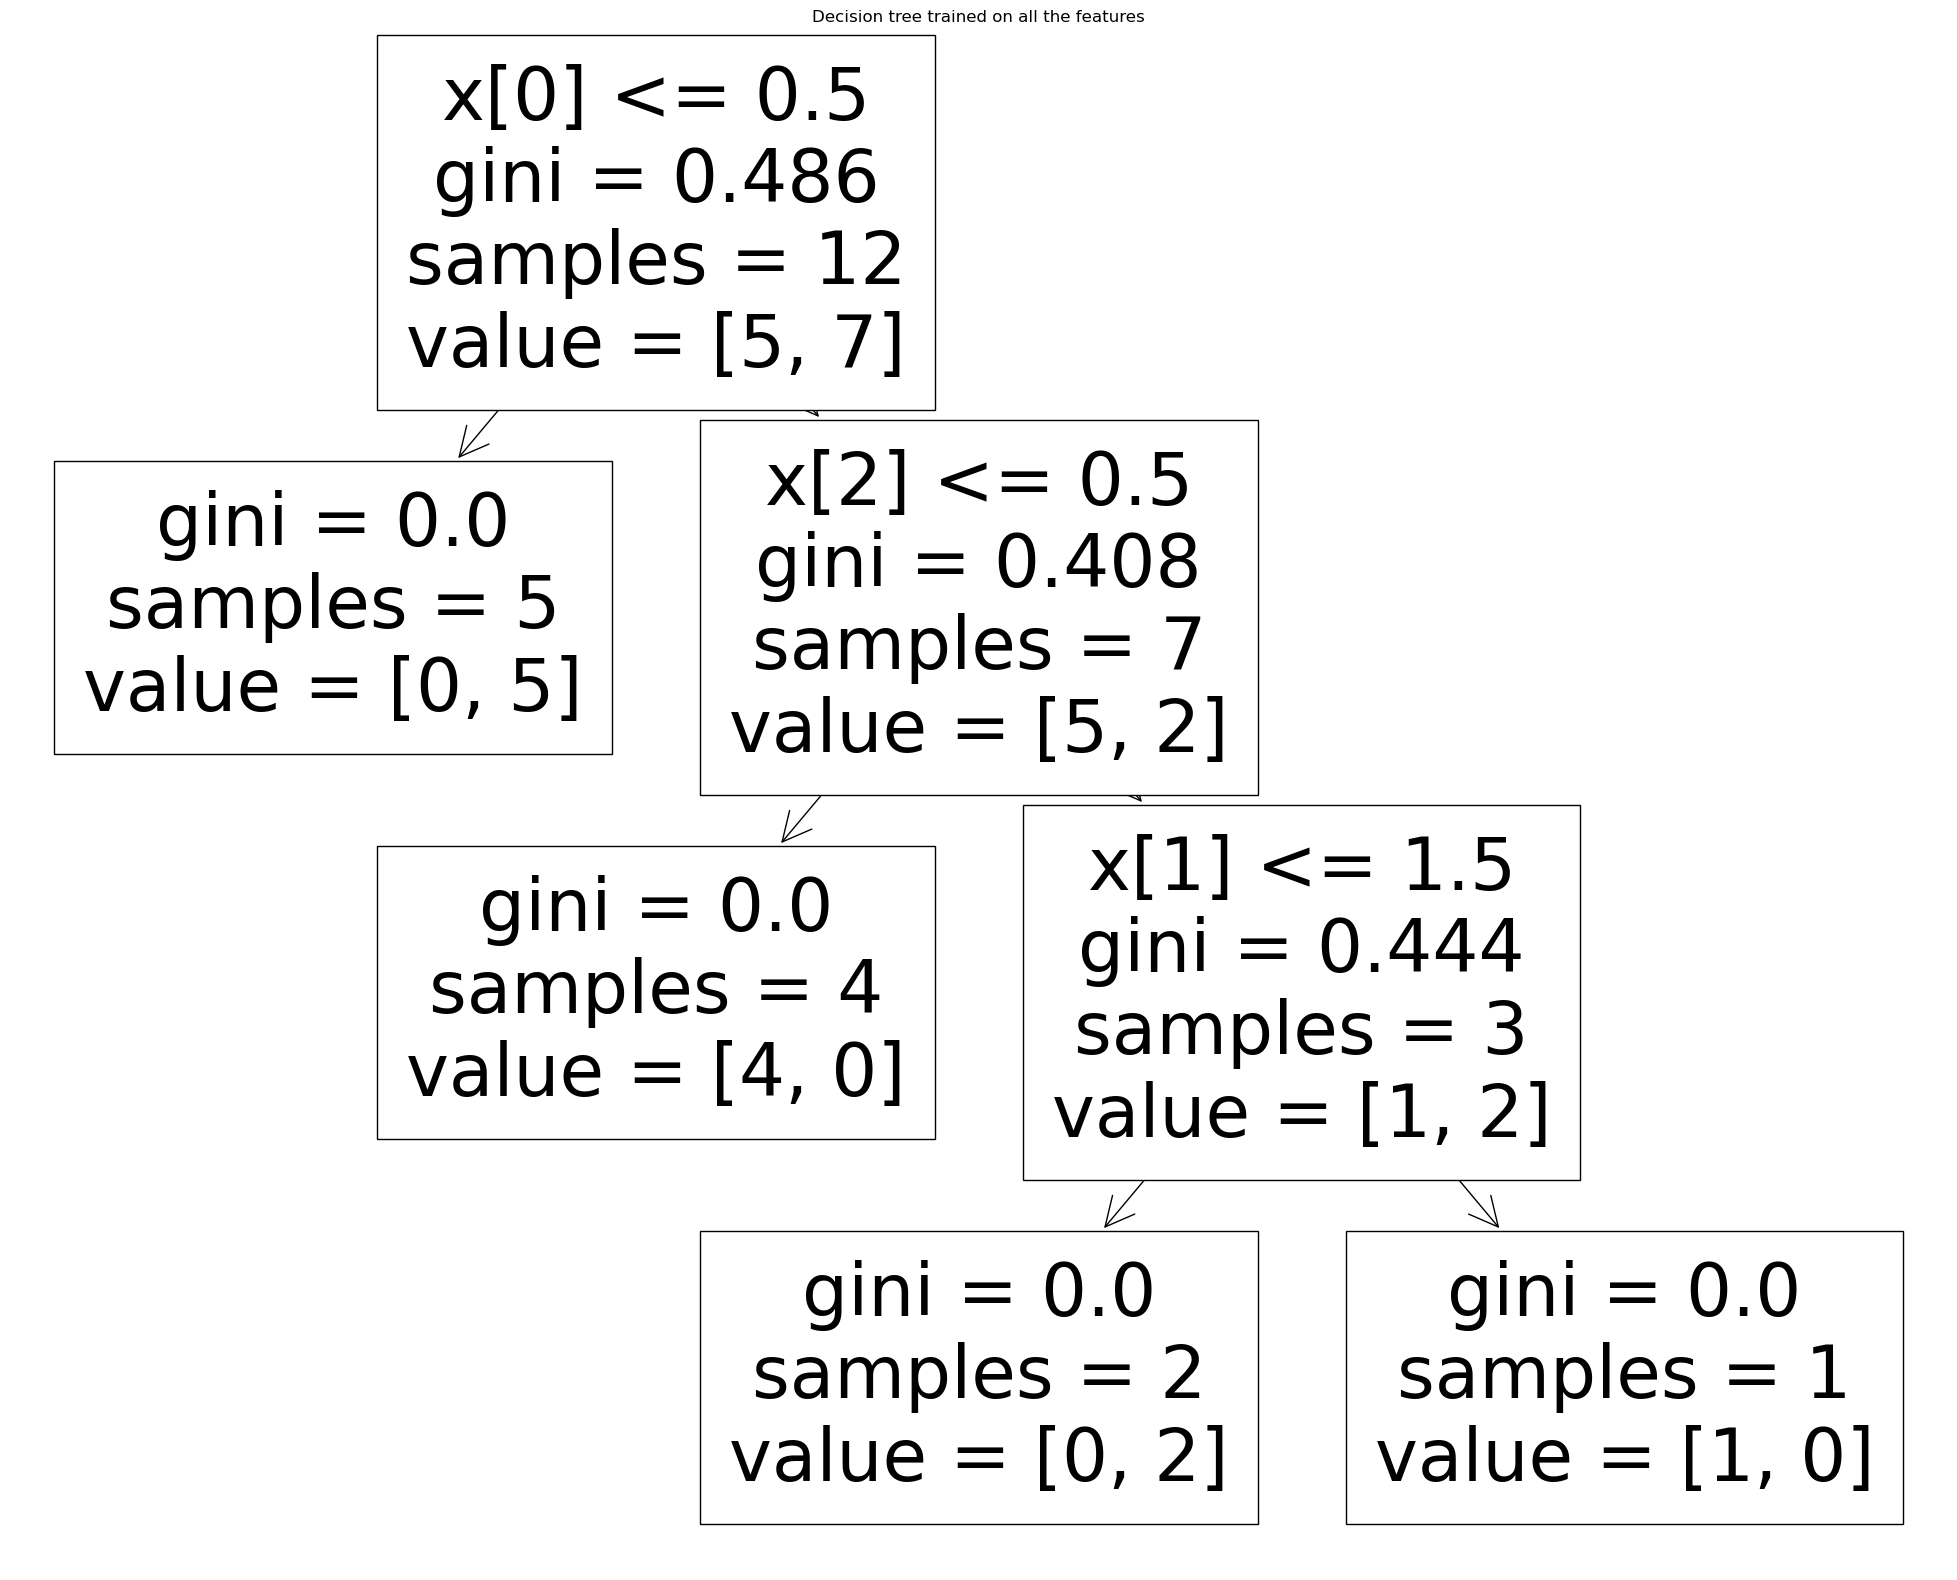

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model)
plt.title(f'Decision tree trained on all the features')
plt.show